<a href="https://colab.research.google.com/github/badjiyoon/da_study/blob/main/ch07_02_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris 데이터를 이용한 SVM 커널 실습

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

# 1. Data

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()

data = iris.data
target = iris.target

In [ ]:
# 1,2번 클라스만 남기고, 변수를 첫번째와 두번째 변수만 사용
data = data[target !=0, :2]
target = target[target !=0]

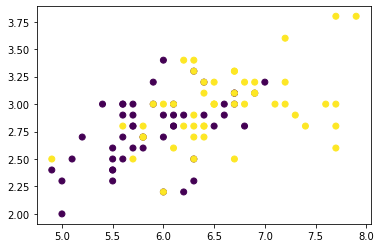

In [ ]:
plt.scatter(data[:, 0], data[:,1], c=target)

In [ ]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(
    data, target, train_size=0.9, random_state=2021
)

# 2. Linear Kernel

SVM은 sklearn.svm의 SVC로 사용할 수 있습니다.

In [ ]:
from sklearn.svm import SVC

우선 가장 기본적인 svm 커널인 linear 커널을 사용해 보겠습니다.

In [ ]:
linear_svc = SVC(kernel="linear")

In [ ]:
linear_svc.fit(train_data, train_target)

SVC(kernel='linear')

아래는 svm의 결과를 시각화하기 위한 함수입니다

In [ ]:
def plot_support_vector_machine(svm):
  # 전체 데이터
  plt.scatter(data[:, 0], data[:,1], c=target, zorder=10, cmap=plt.cm.Paired,
              edgecolor='k', s=20)
  # test 데이터
  plt.scatter(test_data[:,0], test_data[:,1], s=80, facecolors='none',
              zorder=10, edgecolor='k')
  
  plt.axis('tight')
  x_min = data[:,0].min()
  x_max = data[:,0].max()
  y_min = data[:,1].min()
  y_max = data[:,1].max()

  #영역 칠하기
  XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
  Z = svm.decision_function(np.c_[XX.ravel(), YY.ravel()])

  Z = Z.reshape(XX.shape)
  plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired, shading="auto")
  plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
              linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
                    

아래 plot의 속성들은 다음과 같음

- decision boundary
 - 검은색 직선
- support vector
 - 검은색 점선
- 영역
 - 클래스로 구별되는 영역

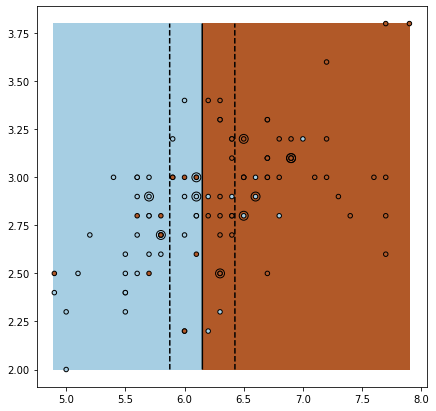

In [ ]:
plt.figure(figsize=(7,7))
plot_support_vector_machine(linear_svc)

# 3. Poly Kernel

다음으로 알아볼 커널은 poly 커널 입니다.\
poly 커널은 직선을 곡선으로 mapping 시켜주는 커널입니다.\
poly 커널에 영향을 미치는 argument들은 다음과 같습니다.

- gamma
 - 결정 경계를 스케일링해주는 값입니다.
- degree
 - 몇 차원의 곡선으로 맵핑할지 정해주는 값입니다.

# 3.1 gamma

3.1.1 "scale"\
default 옵션은 자동으로 scaling 해줍니다.

In [ ]:
poly_svc = SVC(kernel="poly")

In [ ]:
poly_svc.fit(train_data, train_target)

SVC(kernel='poly')

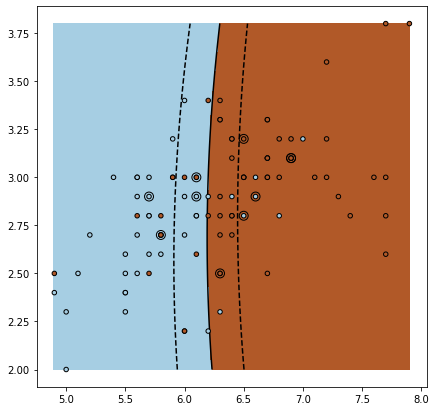

In [ ]:
plt.figure(figsize=(7,7))
plot_support_vector_machine(poly_svc)
# 직선에서 어느정도 곡선으로 변했지만, 크게 변화는 없음

3.1.2 gamma=0.1

gamma값을 작게 주면 다음과 같습니다.

In [ ]:
poly_svc = SVC(kernel="poly", gamma=0.1)
poly_svc.fit(train_data, train_target)

SVC(gamma=0.1, kernel='poly')

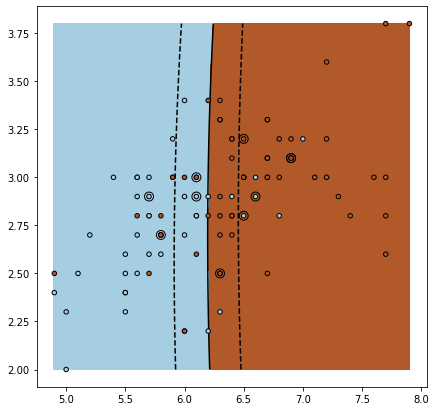

In [ ]:
plt.figure(figsize=(7,7))
plot_support_vector_machine(poly_svc)

3.1.3 gamma=10

In [ ]:
poly_svc = SVC(kernel="poly", gamma=10)
poly_svc.fit(train_data, train_target)

SVC(gamma=10, kernel='poly')

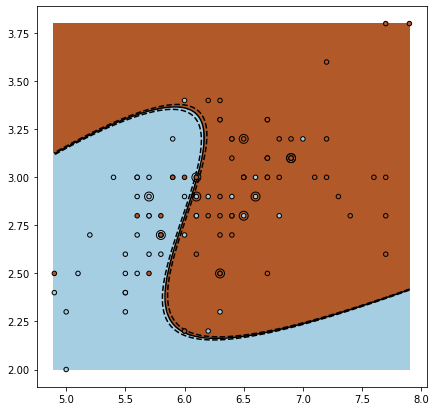

In [ ]:
# gamma값이 클경우, 큰효과가 있음, 크게 곡선으로 그려져서 데이터 더 잘 분류됨
plt.figure(figsize=(7,7))
plot_support_vector_machine(poly_svc)

3.2 degree

3.2.1 degree = 2

In [ ]:
# degree는 몇차원 매핑인지 설정하는것, 2차원
poly_svc = SVC(kernel="poly", gamma=10, degree=2)
poly_svc.fit(train_data, train_target)

SVC(degree=2, gamma=10, kernel='poly')

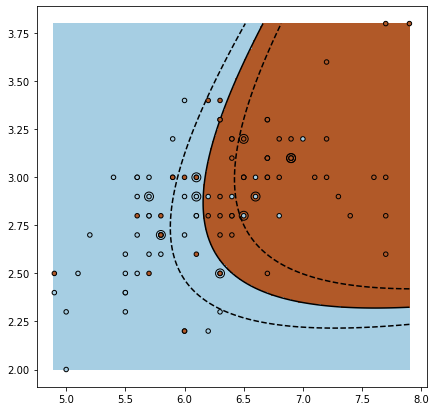

In [ ]:
plt.figure(figsize=(7,7))
plot_support_vector_machine(poly_svc)

3.2.1 degree=4

In [ ]:
# 4차원
poly_svc = SVC(kernel="poly", gamma=10, degree=4)
poly_svc.fit(train_data, train_target)

SVC(degree=4, gamma=10, kernel='poly')

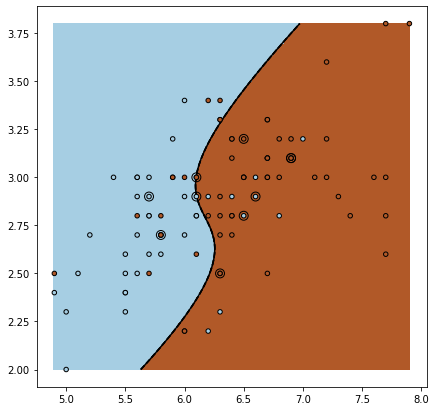

In [ ]:
plt.figure(figsize=(7,7))
plot_support_vector_machine(poly_svc)

# 4. RBF Kernel

다음으로 알아볼 것은 rbf커널 입니다.\
rbf 커널은 데이터를 고차원의 공간으로 mapping 시켜줍니다.\
rbf 또한 gamma 값으로 scaling을 합니다.

4.1 "scale"

In [ ]:
rbf_svc = SVC(kernel="rbf")
rbf_svc.fit(train_data, train_target)

SVC()

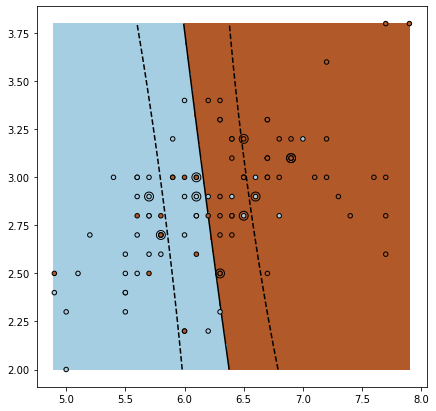

In [ ]:
# 기존 서포트백터와 차이 없음
plt.figure(figsize=(7,7))
plot_support_vector_machine(rbf_svc)

4.3 gamma=0.1

In [ ]:
rbf_svc = SVC(kernel="rbf", gamma=0.1)
rbf_svc.fit(train_data, train_target)

SVC(gamma=0.1)

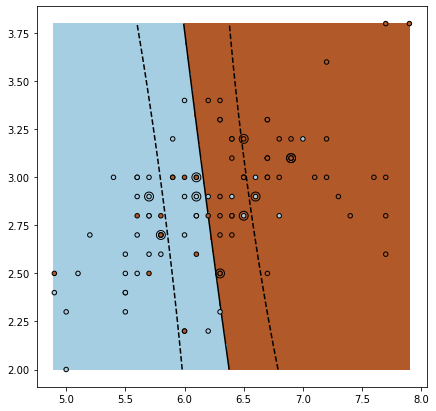

In [ ]:
# gamma값이 작게 주면 값의 변화 크게 없음
plt.figure(figsize=(7,7))
plot_support_vector_machine(rbf_svc)

4.3 gamma = 10

In [ ]:
rbf_svc = SVC(kernel="rbf", gamma=10)
rbf_svc.fit(train_data, train_target)

SVC(gamma=10)

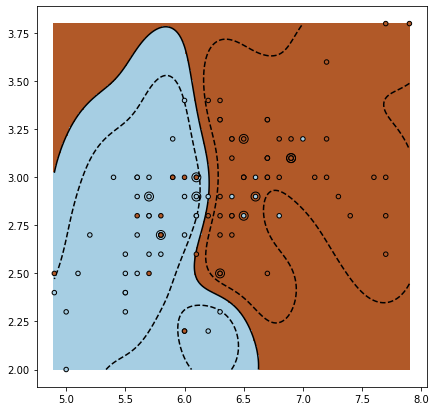

In [ ]:
# gamma값이 크게주면 등고선이 생김, decision boundary여러개 생김
plt.figure(figsize=(7,7))
plot_support_vector_machine(rbf_svc)

# 5. Penalty

패너티는 c argument를 통해 줄 수 있습니다.

5.1 Poly

In [ ]:
# 패널티 없는 support vector machine
poly_svc = SVC(kernel="poly", gamma=10) 
poly_svc.fit(train_data, train_target)

SVC(gamma=10, kernel='poly')

In [ ]:
 # 패널티 있는 support vector machine
hard_penalty_poly_svc = SVC(kernel="poly", gamma=10, C=100) 
hard_penalty_poly_svc.fit(train_data, train_target)

SVC(C=100, gamma=10, kernel='poly')

Text(0.5, 1.0, 'Hard penalty')

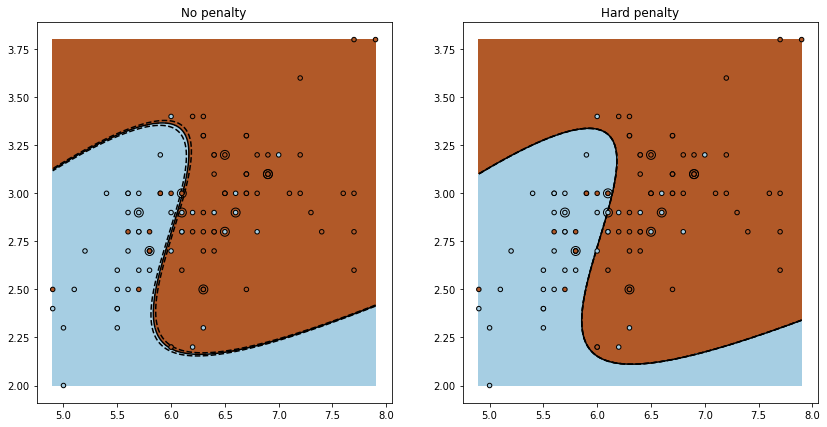

In [ ]:
# 서포트백터가 먼지 가까운지에 차이 밖에없음, 폴리는 이미 최대로 적합을 시켜서 더이상 패널티 반영X
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plot_support_vector_machine(poly_svc)
plt.title("No penalty")
plt.subplot(1,2,2)
plot_support_vector_machine(hard_penalty_poly_svc)
plt.title("Hard penalty")

5.2 RBF

In [ ]:
# 패널티는 RBF모델에서 더 잘 작동함
# 패널티 없음
rbf_svc = SVC(kernel = "rbf", gamma=10)
rbf_svc.fit(train_data, train_target)

SVC(gamma=10)

In [ ]:
# 강한 패널티를 준 support vector machine
hard_penalty_svc = SVC(kernel="rbf", gamma=10, C=100)
hard_penalty_svc.fit(train_data, train_target)

SVC(C=100, gamma=10)

Text(0.5, 1.0, 'Hard penalty')

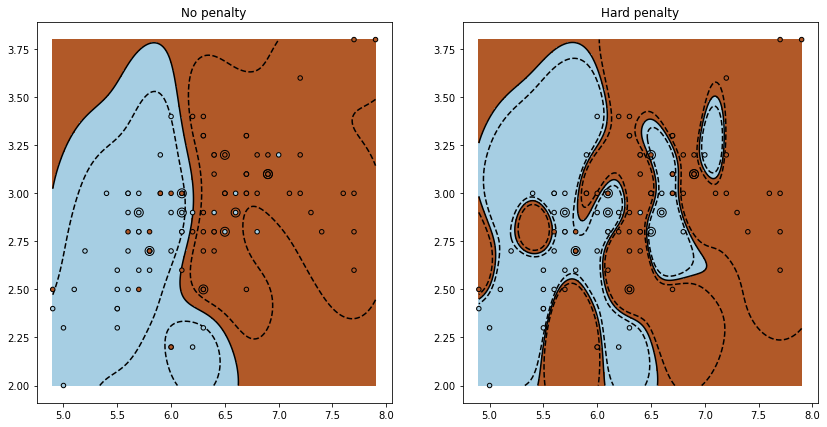

In [ ]:
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plot_support_vector_machine(rbf_svc)
plt.title("No penalty")
plt.subplot(1,2,2)
plot_support_vector_machine(hard_penalty_svc)
plt.title("Hard penalty") # 패널티를 용납하지 않기 위해서 커널이 변함